# Explaining models with SHAP

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap
shap.initjs()

In [2]:
# Loading previous model
loaded_joblib = joblib.load('best-models.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForest'])

In [3]:
# Creating variables from dictionary
rf_model = loaded_joblib['RandomForest']
lin_reg = loaded_joblib['LinearRegression']
preprocessor = loaded_joblib['preprocessor']
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']

## SHAP explainer

In [4]:
# Sample the training data
X_shap = shap.sample(X_train_df, nsamples=1000, random_state=42)
y_shap = y_train.loc[X_shap.index]

X_shap.head()

Item_Visibility  Item_MRP  Item_Fat_Content_Low Fat  \
2937         0.039811  191.3188                       0.0   
6371         0.030414  221.3114                       0.0   
3762         0.000000   37.5822                       1.0   
419          0.027139  127.3336                       1.0   
8475         0.080627   92.5436                       1.0   

      Item_Fat_Content_Regular  Item_Type_Baking Goods  Item_Type_Breads  \
2937                       1.0                     0.0               0.0   
6371                       1.0                     0.0               0.0   
3762                       0.0                     0.0               0.0   
419                        0.0                     0.0               0.0   
8475                       0.0                     0.0               0.0   

      Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
2937                  0.0               0.0              0.0   
6371                  0.0               0.0              0.0   
3762                  0.0               0.0              0.0   
419                   0.0               0.0              0.0   
8475                  0.0               0.0              0.0   

      Item_Type_Frozen Foods  ...  Outlet_Size_MISSING  Outlet_Size_Medium  \
2937                     0.0  ...                  0.0                 0.0   
6371                     0.0  ...                  0.0                 1.0   
3762                     1.0  ...                  1.0                 0.0   
419                      0.0  ...                  1.0                 0.0   
8475                     0.0  ...                  0.0                 1.0   

      Outlet_Size_Small  Outlet_Location_Type_Tier 1  \
2937                0.0                          0.0   
6371                0.0                          0.0   
3762                0.0                          0.0   
419                 0.0                          0.0   
8475                0.0                          1.0   

      Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
2937                          0.0                          1.0   
6371                          0.0                          1.0   
3762                          0.0                          1.0   
419                           1.0                          0.0   
8475                          0.0                          0.0   

      Outlet_Type_Grocery Store  Outlet_Type_Supermarket Type1  \
2937                        0.0                            1.0   
6371                        0.0                            0.0   
3762                        1.0                            0.0   
419                         0.0                            1.0   
8475                        0.0                            1.0   

      Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
2937                            0.0                            0.0  
6371                            1.0                            0.0  
3762                            0.0                            0.0  
419                             0.0                            0.0  
8475                            0.0                            0.0  

[5 rows x 31 columns]

In [5]:
# Creating model explainer
rf_explainer = shap.Explainer(rf_model)

In [6]:
# Displaying shap values from the explainer
rf_shap_values = rf_explainer(X_shap, y_shap)
rf_shap_values.shape

(1000, 31)

Text(0.5, 1.0, 'Random Forest SHAP Summary:')

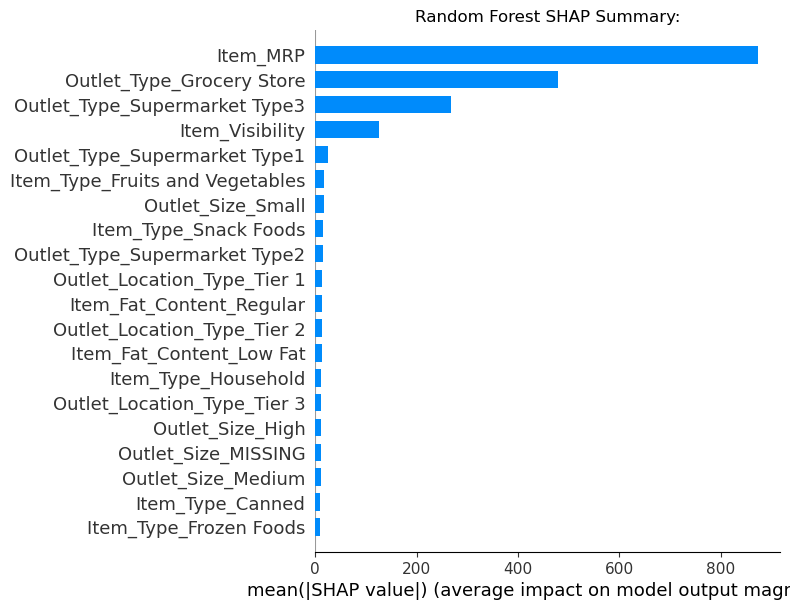

In [7]:
# Creating summary bar plot with SHAP values
fig1 = shap.summary_plot(rf_shap_values, features=X_shap, plot_type='bar',
                 show=False, plot_size=[8,6]);

plt.title('Random Forest SHAP Summary:')

### **Comparing the feature importances bar plot to SHAP value**
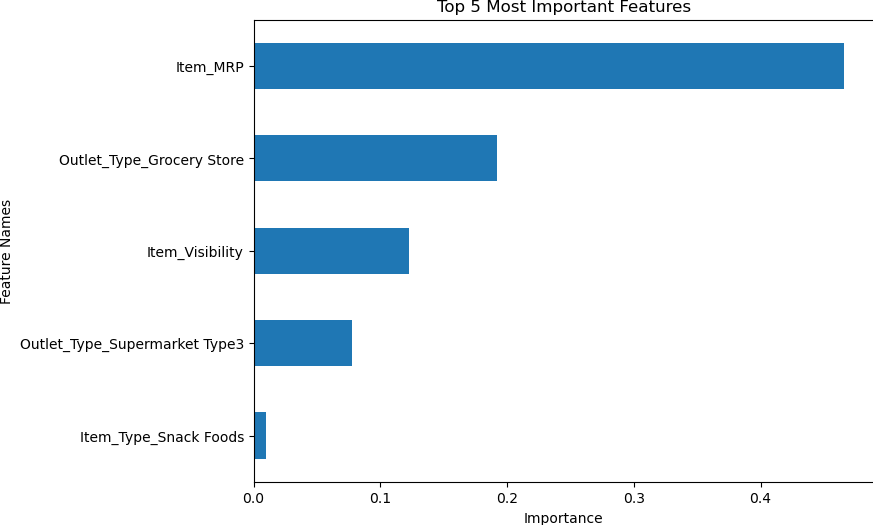

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


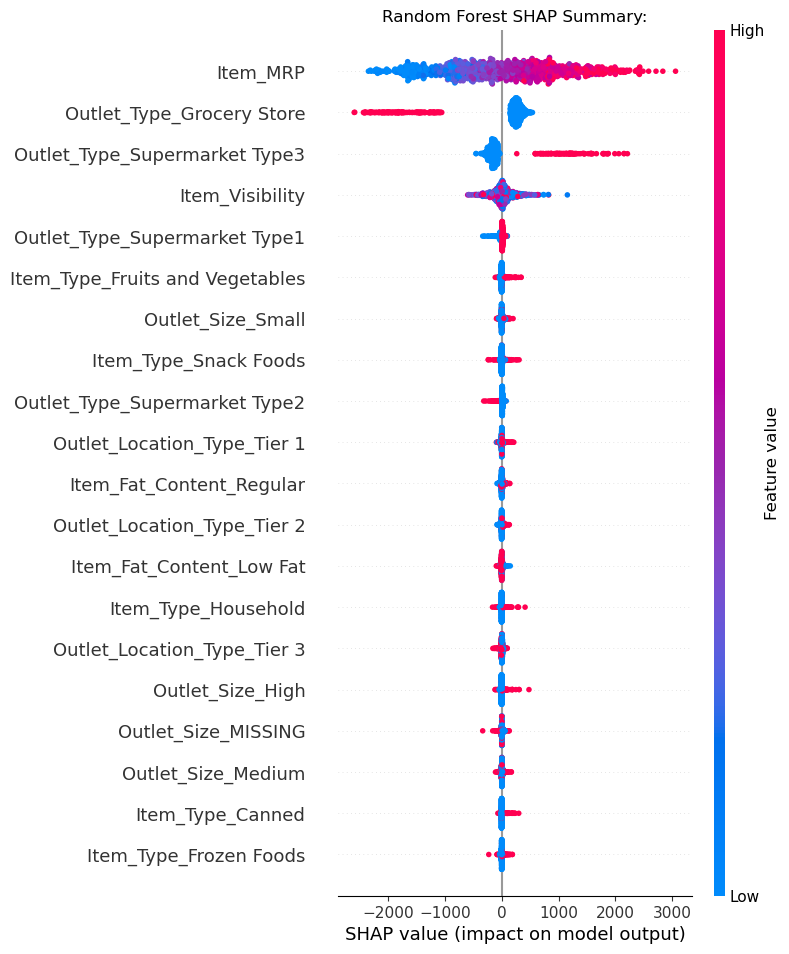

In [8]:
# Creating summary plot with SHAP values
fig2 = shap.summary_plot(rf_shap_values, features=X_shap,
                 show=False);

plt.title('Random Forest SHAP Summary:');

# Local Explanations

In [9]:
print(X_shap.index[:5])

Int64Index([2937, 6371, 3762, 419, 8475], dtype='int64')


In [10]:
## Making a vers of shap vars with 0-based integer index 
# so what it matches the index for the shap_vallues
X_shap_local = X_shap.reset_index(drop=True)
y_shap_local = y_shap.reset_index(drop=True)
X_shap_local.head()

Item_Visibility  Item_MRP  Item_Fat_Content_Low Fat  \
0         0.039811  191.3188                       0.0   
1         0.030414  221.3114                       0.0   
2         0.000000   37.5822                       1.0   
3         0.027139  127.3336                       1.0   
4         0.080627   92.5436                       1.0   

   Item_Fat_Content_Regular  Item_Type_Baking Goods  Item_Type_Breads  \
0                       1.0                     0.0               0.0   
1                       1.0                     0.0               0.0   
2                       0.0                     0.0               0.0   
3                       0.0                     0.0               0.0   
4                       0.0                     0.0               0.0   

   Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
0                  0.0               0.0              0.0   
1                  0.0               0.0              0.0   
2                  0.0               0.0              0.0   
3                  0.0               0.0              0.0   
4                  0.0               0.0              0.0   

   Item_Type_Frozen Foods  ...  Outlet_Size_MISSING  Outlet_Size_Medium  \
0                     0.0  ...                  0.0                 0.0   
1                     0.0  ...                  0.0                 1.0   
2                     1.0  ...                  1.0                 0.0   
3                     0.0  ...                  1.0                 0.0   
4                     0.0  ...                  0.0                 1.0   

   Outlet_Size_Small  Outlet_Location_Type_Tier 1  \
0                0.0                          0.0   
1                0.0                          0.0   
2                0.0                          0.0   
3                0.0                          0.0   
4                0.0                          1.0   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                          0.0                          1.0   
1                          0.0                          1.0   
2                          0.0                          1.0   
3                          1.0                          0.0   
4                          0.0                          0.0   

   Outlet_Type_Grocery Store  Outlet_Type_Supermarket Type1  \
0                        0.0                            1.0   
1                        0.0                            0.0   
2                        1.0                            0.0   
3                        0.0                            1.0   
4                        0.0                            1.0   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
0                            0.0                            0.0  
1                            1.0                            0.0  
2                            0.0                            0.0  
3                            0.0                            0.0  
4                            0.0                            0.0  

[5 rows x 31 columns]

In [11]:
# Maximum range for local feature
highidx = y_shap_local.idxmax()
highidx

94

In [13]:
# Display row 94 values and save as variable
highfeat = X_shap_local.iloc[highidx]
highfeat

Item_Visibility                      0.019495
Item_MRP                           261.291000
Item_Fat_Content_Low Fat             0.000000
Item_Fat_Content_Regular             1.000000
Item_Type_Baking Goods               0.000000
Item_Type_Breads                     0.000000
Item_Type_Breakfast                  0.000000
Item_Type_Canned                     0.000000
Item_Type_Dairy                      1.000000
Item_Type_Frozen Foods               0.000000
Item_Type_Fruits and Vegetables      0.000000
Item_Type_Hard Drinks                0.000000
Item_Type_Health and Hygiene         0.000000
Item_Type_Household                  0.000000
Item_Type_Meat                       0.000000
Item_Type_Others                     0.000000
Item_Type_Seafood                    0.000000
Item_Type_Snack Foods                0.000000
Item_Type_Soft Drinks                0.000000
Item_Type_Starchy Foods              0.000000
Outlet_Size_High                     1.000000
Outlet_Size_MISSING               

In [16]:
# Create force plot to dispaly and explain in Readme section
shap.force_plot(rf_explainer.expected_value,
               shap_values=rf_shap_values[highidx].values,
               features=X_shap_local.iloc[highidx])

In [20]:
# Minimum range for features
lowidx = y_shap_local.idxmin()
lowidx

829

In [21]:
# Display row 829 values and save as variable
lowfeat = X_shap_local.iloc[lowidx]
lowfeat

Item_Visibility                     0.0000
Item_MRP                           40.5138
Item_Fat_Content_Low Fat            1.0000
Item_Fat_Content_Regular            0.0000
Item_Type_Baking Goods              0.0000
Item_Type_Breads                    0.0000
Item_Type_Breakfast                 0.0000
Item_Type_Canned                    0.0000
Item_Type_Dairy                     0.0000
Item_Type_Frozen Foods              0.0000
Item_Type_Fruits and Vegetables     0.0000
Item_Type_Hard Drinks               0.0000
Item_Type_Health and Hygiene        0.0000
Item_Type_Household                 0.0000
Item_Type_Meat                      0.0000
Item_Type_Others                    0.0000
Item_Type_Seafood                   0.0000
Item_Type_Snack Foods               0.0000
Item_Type_Soft Drinks               1.0000
Item_Type_Starchy Foods             0.0000
Outlet_Size_High                    0.0000
Outlet_Size_MISSING                 0.0000
Outlet_Size_Medium                  0.0000
Outlet_Size

In [22]:
# Create force plot to dispaly and explain in Readme section
shap.force_plot(rf_explainer.expected_value,
               shap_values=rf_shap_values[lowidx].values,
               features=X_shap_local.iloc[lowidx])

# LIME: Random Forest Local Explanation

In [17]:
from lime.lime_tabular import LimeTabularExplainer

# Create a lime explainer with X_shap_local with regression as the mode

lime_explainer = LimeTabularExplainer(training_data=X_shap_local.values,
                                      feature_names = X_shap_local.columns,
                                      mode='regression')

lime_explainer

In [19]:
# Use the lime explainer to plot and explain in Readme section
exp = lime_explainer.explain_instance(X_shap_local.loc[highidx],
                                      rf_model.predict)
exp.show_in_notebook();

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [23]:
# Use the lime explainer to plot and explain in Readme section 
expl = lime_explainer.explain_instance(X_shap_local.loc[lowidx],
                                      rf_model.predict)
expl.show_in_notebook();

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
